In [335]:
import networkx as nx
import ts2vg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ts2vg import NaturalVG, HorizontalVG
import seaborn as sns

%matplotlib inline

<h2>Task 1</h2>
1. Загрузим данные; нормированный к [0,1] логарифм дневной доходности будет в столбце normlogret

In [336]:
def get_normlogret(t):
    df=pd.read_csv(t,sep=';',parse_dates=['<DATE>'],dayfirst=True,index_col=['<DATE>']) \
            .drop(columns=['<TIME>','<OPEN>','<HIGH>','<LOW>','<VOL>'])
    df['logret'] = np.log(df['<CLOSE>']/df.shift()['<CLOSE>'])
    df=df.dropna()
    df['normlogret'] = (df.logret - df.logret.min()) / (df.logret.max() - df.logret.min())
    return df

In [337]:
moex = 'IMOEX_02012024_03012024_1.csv'

In [338]:
df = get_normlogret(moex)
df

,<CLOSE>,logret,normlogret
<DATE>,,,
2023-01-04,2168.42,-0.001963,0.454917
2023-01-05,2156.67,-0.005433,0.398413
2023-01-06,2156.39,-0.000130,0.484754
2023-01-09,2163.50,0.003292,0.540456
2023-01-10,2159.51,-0.001846,0.456816
...,...,...,...
2023-12-25,3099.02,0.002080,0.520733
2023-12-26,3094.72,-0.001388,0.464263
2023-12-27,3097.49,0.000895,0.501432


<AxesSubplot:xlabel='<DATE>'>

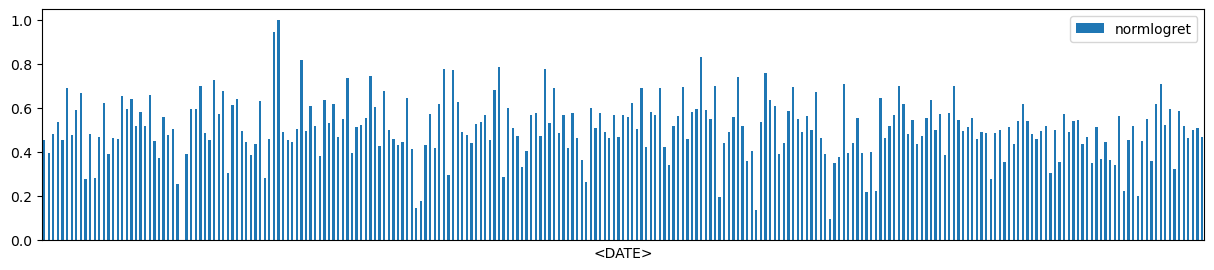

In [339]:
df.plot.bar( y='normlogret', xticks=[], figsize=(15,3))

2. Строим графы видимости с помощью ts2vg.

In [340]:
vg = HorizontalVG(directed="left_to_right")
vg.build(df['normlogret'])
vg1 = NaturalVG(directed="left_to_right")
vg1.build(df['normlogret'])
G=vg.as_networkx()
H=vg1.as_networkx()

In [341]:
def get_nodes_positions(G):
    # координаты узлов на рисунке
    p=dict()
    for i in G.nodes():
        p[i] = (i,0)
    return p

In [342]:
def differ_edges(G):
    # разделить ребра, которые будут нарисованы отрезками (между соседними вершинами) и дугами (остальные)
    straight_edges = [i for i in G.edges() if (i[0]+1 == i[1])]
    curved_edges = list(set(G.edges()) - set(straight_edges))
    return (straight_edges, curved_edges)

In [343]:
def draw_vid_graph(G):
    # рисуем полученный граф видимости
    p=get_nodes_positions(G)
    straight_edges, curved_edges = differ_edges(G)
    plt.figure(figsize=(15,5))
    nx.draw_networkx_nodes(G, pos=p, node_size=0.1)
    nx.draw_networkx_edges(G, pos=p, node_size=1, edgelist=straight_edges, width=0.1)
    nx.draw_networkx_edges(G, pos=p, node_size=1, edgelist=curved_edges, width=0.1, connectionstyle=f'arc3, rad = {0.5}', arrows=True)
    None

Рисуем граф горизонтальной видимости:

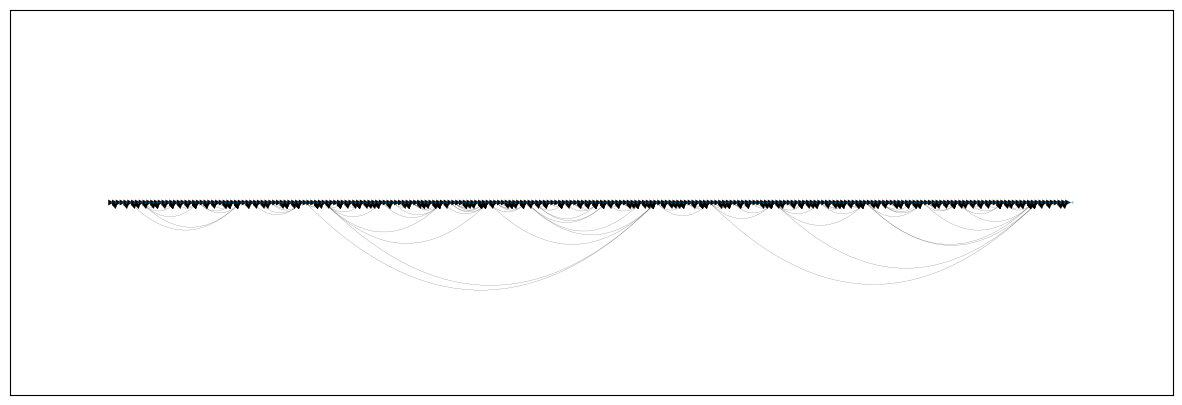

In [344]:
draw_vid_graph(G)

Рисуем граф обычной видимости:

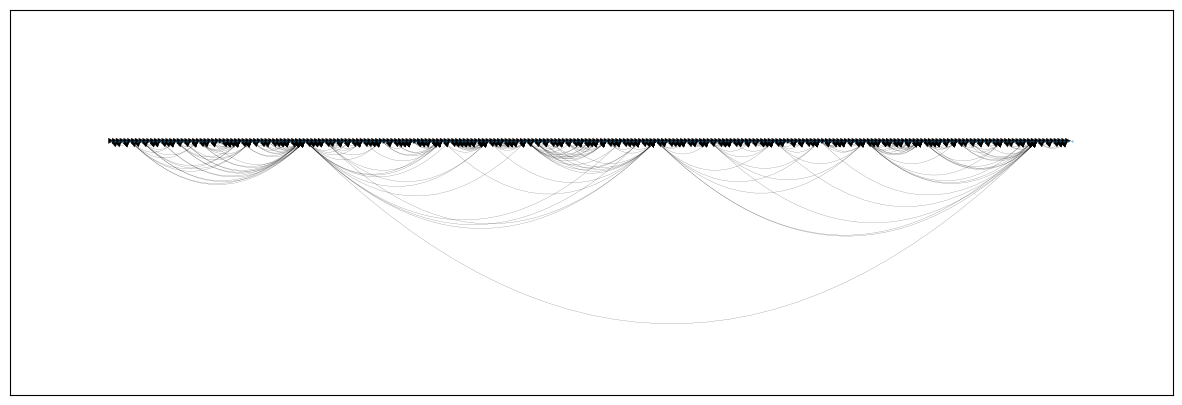

In [345]:
draw_vid_graph(H)

То же без использования библиотеки.
G1 - горизонтальная видимость, H1 - обычная.

In [346]:
G1 = nx.Graph()
for i in range(0, len(df['normlogret'])): G1.add_node(i)
H1 = G1.copy()

In [347]:
g=[]
h=[]

In [348]:
for i in range(0, len(df['normlogret'])):
    m=0.
    tg=-2.
    for j in range(i+1, len(df['normlogret'])):
        if (m<=df['normlogret'][i]) and (m<=df['normlogret'][j]):
            g.append((i,j))
            m=df['normlogret'][j] #if (m<df['normlogret'][j]):
        if (((df['normlogret'][j] - df['normlogret'][i]) / (j-i)) > tg):
            h.append((i,j))
            tg = (df['normlogret'][j] - df['normlogret'][i]) / (j-i)
G1.add_edges_from(g)
H1.add_edges_from(h)

Проверим, что полученные самостоятельно графы равны графам, полученным с помощью ts2vg...

In [349]:
(G1.edges() == G.edges(), G1.nodes() == G.nodes())

(True, True)

In [350]:
(H1.edges() == H.edges(), H1.nodes() == H.nodes())

(True, True)

... и нарисуем - рисунки такие же.

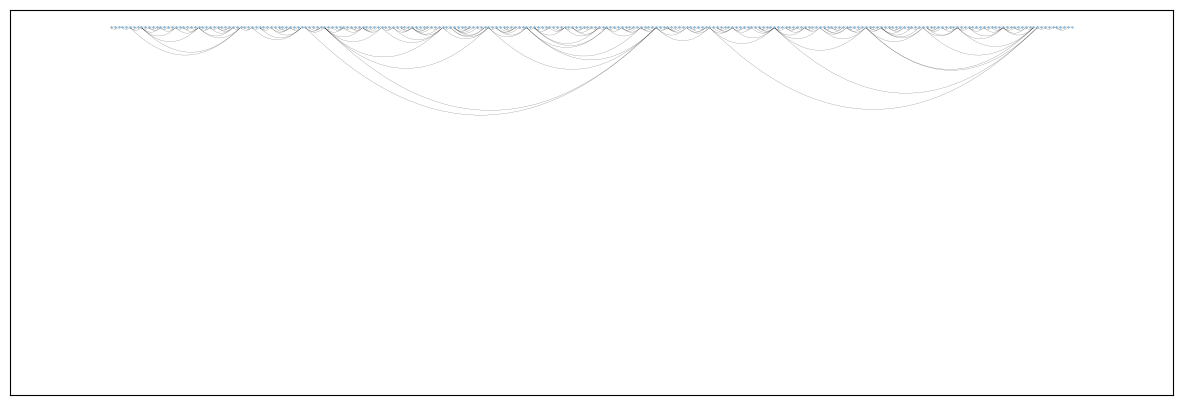

In [351]:
draw_vid_graph(G1)

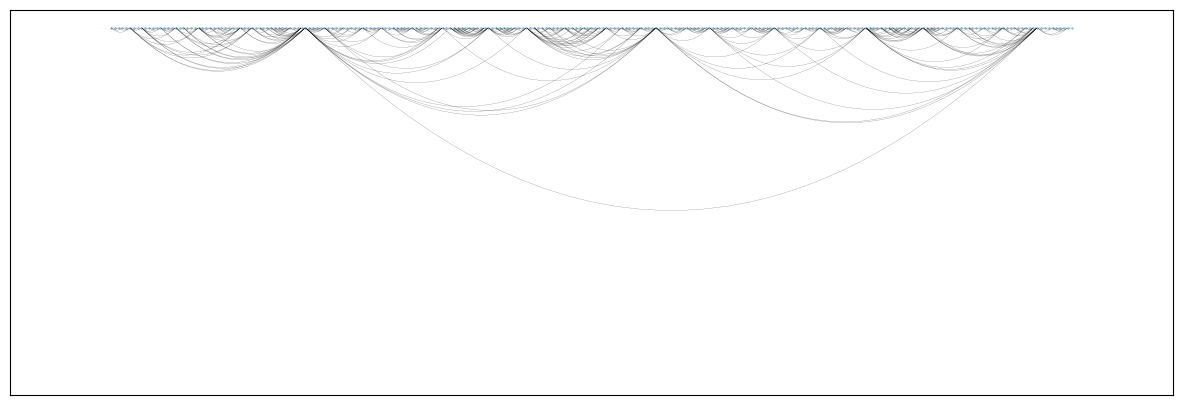

In [352]:
draw_vid_graph(H1)

<h2>Task 2</h2><br>Загрузим данные, найдем нормированные логарифмические доходности.

In [353]:
sber = 'SBER_01012023_31122023.csv'
df_sber = get_normlogret(sber)
df_sber

,<CLOSE>,logret,normlogret
<DATE>,,,
2023-01-04,141.43,-0.002472,0.311904
2023-01-05,141.27,-0.001132,0.321044
2023-01-06,141.40,0.000920,0.335042
2023-01-09,142.40,0.007047,0.376845
2023-01-10,142.81,0.002875,0.348381
...,...,...,...
2023-12-25,271.08,-0.000811,0.323232
2023-12-26,271.90,0.003020,0.349373
2023-12-27,271.08,-0.003020,0.308161


In [354]:
gazp = 'GAZP_01012023_31122023.csv'
df_gazp = get_normlogret(gazp)
df_gazp

,<CLOSE>,logret,normlogret
<DATE>,,,
2023-01-04,162.51,-0.006196,0.263965
2023-01-05,161.20,-0.008094,0.246382
2023-01-06,162.10,0.005568,0.372948
2023-01-09,162.71,0.003756,0.356165
2023-01-10,162.10,-0.003756,0.286568
...,...,...,...
2023-12-25,161.09,-0.006189,0.264032
2023-12-26,161.00,-0.000559,0.316189
2023-12-27,159.86,-0.007106,0.255533


In [355]:
gmkn = 'GMKN_01012023_31122023.csv'
df_gmkn = get_normlogret(gmkn)
df_gmkn

,<CLOSE>,logret,normlogret
<DATE>,,,
2023-01-04,15574.0,0.003473,0.617575
2023-01-05,15340.0,-0.015139,0.415167
2023-01-06,15438.0,0.006368,0.649056
2023-01-09,15370.0,-0.004414,0.531796
2023-01-10,15324.0,-0.002997,0.547207
...,...,...,...
2023-12-25,17130.0,0.000467,0.584882
2023-12-26,16360.0,-0.045992,0.079644
2023-12-27,16310.0,-0.003061,0.546515


Добавим колонку с символами

In [356]:
def sq(x,d):
    if x==0: return 'e'
    elif (0<x) and (x<=d): return 'r'
    elif (x>d): return 'R'
    elif (-d<x) and (x<0): return 'd'
    return 'D'

In [357]:
def get_code(df_sber):
    df_sber['deltaP'] = df_sber['normlogret'] - df_sber['normlogret'].shift()
    df_sber = df_sber.dropna()
    d = df_sber['deltaP'].abs().mean()
    df_sber.insert(loc=len(df_sber.columns), column='code', value=df_sber['deltaP'].apply(lambda x: sq(x,d)))
    return df_sber

In [358]:
df_sber = get_code(df_sber)
df_sber

,<CLOSE>,logret,normlogret,deltaP,code
<DATE>,,,,,
2023-01-05,141.27,-0.001132,0.321044,0.009140,r
2023-01-06,141.40,0.000920,0.335042,0.013998,r
2023-01-09,142.40,0.007047,0.376845,0.041803,r
2023-01-10,142.81,0.002875,0.348381,-0.028464,d
2023-01-11,149.96,0.048854,0.662059,0.313678,R
...,...,...,...,...,...
2023-12-25,271.08,-0.000811,0.323232,-0.160937,D
2023-12-26,271.90,0.003020,0.349373,0.026140,r
2023-12-27,271.08,-0.003020,0.308161,-0.041212,d


In [359]:
df_gazp = get_code(df_gazp)
df_gazp

,<CLOSE>,logret,normlogret,deltaP,code
<DATE>,,,,,
2023-01-05,161.20,-0.008094,0.246382,-0.017584,d
2023-01-06,162.10,0.005568,0.372948,0.126566,R
2023-01-09,162.71,0.003756,0.356165,-0.016783,d
2023-01-10,162.10,-0.003756,0.286568,-0.069596,d
2023-01-11,165.83,0.022750,0.532134,0.245565,R
...,...,...,...,...,...
2023-12-25,161.09,-0.006189,0.264032,-0.087104,d
2023-12-26,161.00,-0.000559,0.316189,0.052157,r
2023-12-27,159.86,-0.007106,0.255533,-0.060656,d


In [360]:
df_gmkn = get_code(df_gmkn)
df_gmkn

,<CLOSE>,logret,normlogret,deltaP,code
<DATE>,,,,,
2023-01-05,15340.0,-0.015139,0.415167,-0.202408,D
2023-01-06,15438.0,0.006368,0.649056,0.233889,R
2023-01-09,15370.0,-0.004414,0.531796,-0.117260,d
2023-01-10,15324.0,-0.002997,0.547207,0.015411,r
2023-01-11,15410.0,0.005596,0.640663,0.093456,r
...,...,...,...,...,...
2023-12-25,17130.0,0.000467,0.584882,-0.020355,d
2023-12-26,16360.0,-0.045992,0.079644,-0.505238,D
2023-12-27,16310.0,-0.003061,0.546515,0.466871,R


In [361]:
nodes = []
edges = []
node_size = []
minsize=20
width_koef=5
width = []
sy=[]
for i in range(0,len(df_gmkn)): sy.append(df_sber.code[i]+df_gazp.code[i]+df_gmkn.code[i]) #состояния рынка на каждый день
for i in range(0,len(df_gmkn)):
    nsy = nodes.count(sy[i])
    if nsy == 0:
        nodes.append(sy[i])
        node_size.append(minsize)
    else:
        node_size[nodes.index(sy[i])] +=minsize

ed_tab = pd.DataFrame(index = nodes, columns = nodes).fillna(0)
for i in range(1,len(sy)):
    ed_tab.loc[sy[i-1],sy[i]] +=1 #откуда - индекс, куда - колонка
ed_tab = ed_tab / ed_tab.sum()

for i in ed_tab.index:
    for j in ed_tab:
        if ed_tab.loc[i,j] != 0 :
            edges.append((i,j,ed_tab.loc[i,j]))
            width.append(width_koef*ed_tab.loc[i,j])

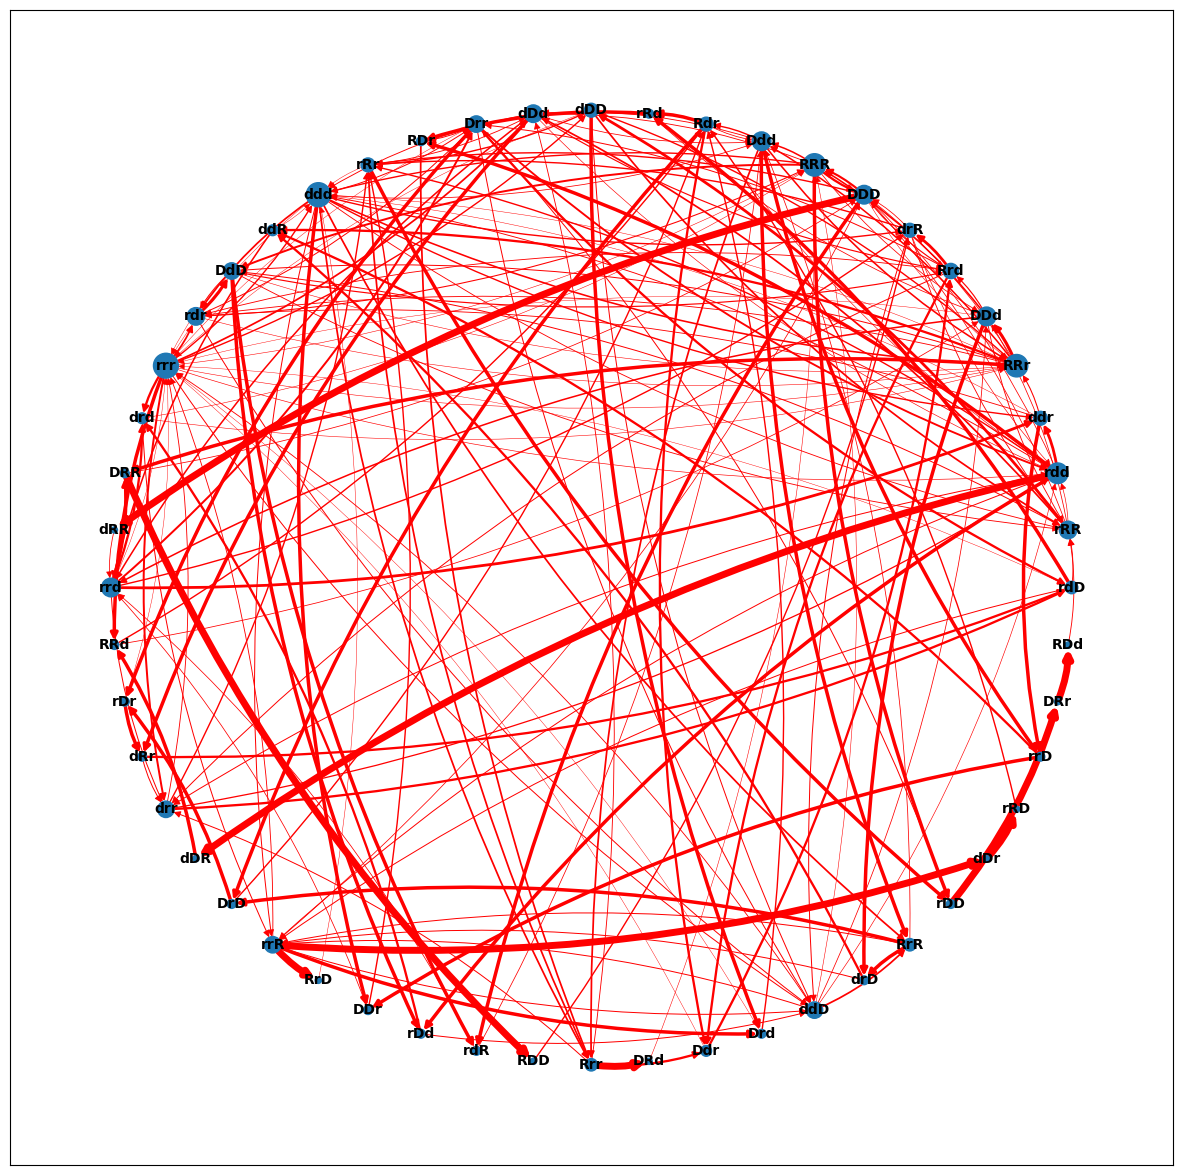

In [362]:
Sym = nx.DiGraph()
Sym.add_nodes_from(nodes)
Sym.add_weighted_edges_from(edges)

plt.figure(figsize=(15,15))
nx.draw_networkx(Sym, pos=nx.circular_layout(Sym),node_size=node_size,width=width,with_labels=True,font_size=10, \
                font_weight='bold', edge_color='red', connectionstyle=f'arc3, rad = {0.1}', arrows=True)


<h2>Task 3</h2>

In [363]:
sb_t3 = df_sber.copy()
sb_t3 = sb_t3.drop(columns=['logret','normlogret','deltaP','code'])
sb_t3['ret'] = sb_t3['<CLOSE>'] - sb_t3['<CLOSE>'].shift()
sb_t3 = sb_t3.dropna()
sb_t3['sgn'] = sb_t3['ret'].apply(np.sign).astype(int).astype(str)
sb_t3['v3'] = sb_t3['sgn'].shift(3) + sb_t3['sgn'].shift(2) + sb_t3['sgn'].shift()
sb_t3 = sb_t3.dropna()
sb_t3

,<CLOSE>,ret,sgn,v3
<DATE>,,,,
2023-01-11,149.96,7.15,1,111
2023-01-12,149.30,-0.66,-1,111
2023-01-13,151.69,2.39,1,11-1
2023-01-16,153.71,2.02,1,1-11
2023-01-17,150.45,-3.26,-1,-111
...,...,...,...,...
2023-12-25,271.08,-0.22,-1,-1-11
2023-12-26,271.90,0.82,1,-11-1
2023-12-27,271.08,-0.82,-1,1-11


In [364]:
nodes=[]
edges=[]
for i in sb_t3['v3']:
    nsy = nodes.count(i)
    if nsy == 0:
        nodes.append(i)

ed_tab = pd.DataFrame(index = nodes, columns = nodes).fillna(0)
for i in range(1,len(sb_t3['v3'])):
    ed_tab.loc[sb_t3['v3'][i-1],sb_t3['v3'][i]] +=1 #откуда - индекс, куда - колонка
ed_tab = round(ed_tab / ed_tab.sum() , 3)

for i in ed_tab.index:
    for j in ed_tab:
        if ed_tab.loc[i,j] != 0 :
            edges.append((i,j,ed_tab.loc[i,j]))
edges

[('111', '111', 0.553),
 ('111', '11-1', 0.529),
 ('11-1', '1-11', 0.419),
 ('11-1', '1-1-1', 0.64),
 ('1-11', '-111', 0.697),
 ('1-11', '-11-1', 0.545),
 ('1-11', '-110', 1.0),
 ('-111', '111', 0.447),
 ('-111', '11-1', 0.471),
 ('-11-1', '1-11', 0.558),
 ('-11-1', '1-1-1', 0.36),
 ('1-1-1', '-1-11', 0.6),
 ('1-1-1', '-1-1-1', 0.769),
 ('-1-11', '-111', 0.303),
 ('-1-11', '-11-1', 0.455),
 ('-1-1-1', '-1-11', 0.4),
 ('-1-1-1', '-1-1-1', 0.231),
 ('-110', '101', 1.0),
 ('101', '01-1', 1.0),
 ('01-1', '1-11', 0.023)]

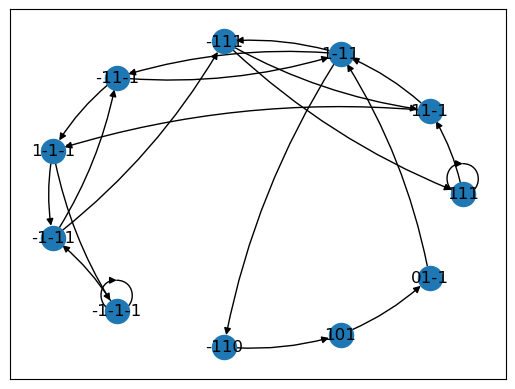

In [365]:
V = nx.DiGraph()
V.add_nodes_from(nodes)
V.add_weighted_edges_from(edges)

labels = nx.get_edge_attributes(V,'weight')
nx.draw_networkx(V,pos=nx.circular_layout(V),connectionstyle=f'arc3, rad = {0.1}', arrows=True)
#a=nx.draw_networkx_edge_labels(V, pos=nx.circular_layout(V), edge_labels=labels,font_size=8)
#Предыдущую строку можно раскомментировать - на ребрах появятся аероятности.

<h2>Task 4</h2>

In [366]:
def get_returns(t):
    df=pd.read_csv(t,sep=';',parse_dates=['<DATE>'],dayfirst=True,index_col=['<DATE>']) \
            .drop(columns=['<TIME>','<OPEN>','<HIGH>','<LOW>','<VOL>'])
    df['ret'] = df['<CLOSE>']/df.shift()['<CLOSE>']
    df=df.dropna()
    return df

In [367]:
tickers = ['SBER','SBERP','GAZP','GMKN','LKOH','VTBR','ROSN','SNGS','ALRS','MOEX']

In [368]:
rets=dict()
for i in tickers:
    fn=i+'_01012023_31122023.csv'
    rets[i] = get_returns(fn)
rets['SBER']

,<CLOSE>,ret
<DATE>,,
2023-01-04,141.43,0.997531
2023-01-05,141.27,0.998869
2023-01-06,141.40,1.000920
2023-01-09,142.40,1.007072
2023-01-10,142.81,1.002879
...,...,...
2023-12-25,271.08,0.999189
2023-12-26,271.90,1.003025
2023-12-27,271.08,0.996984


In [369]:
df_rets=pd.DataFrame()
for i in tickers:
    df_rets.insert(loc=len(df_rets.columns), column=i, value=rets[i]['ret'])
df_rets

,SBER,SBERP,GAZP,GMKN,LKOH,VTBR,ROSN,SNGS,ALRS,MOEX
<DATE>,,,,,,,,,,
2023-01-04,0.997531,0.996818,0.993823,1.003479,0.998181,0.999088,0.993887,0.995207,0.998821,1.002616
2023-01-05,0.998869,0.997163,0.991939,0.984975,0.992954,0.993305,1.004647,0.996560,0.993421,0.999896
2023-01-06,1.000920,0.996728,1.005583,1.006389,1.000489,0.992953,0.999456,0.998159,0.998981,0.993736
2023-01-09,1.007072,1.013346,1.003763,0.995595,1.005136,1.015736,1.001770,0.997003,1.005609,1.003572
2023-01-10,1.002879,0.999718,0.996251,0.997007,0.992457,0.994228,0.996739,0.993062,1.010987,0.993615
...,...,...,...,...,...,...,...,...,...,...
2023-12-25,0.999189,0.999115,0.993831,1.000467,1.001708,1.009576,1.001199,0.998548,0.987037,0.992835
2023-12-26,1.003025,1.004099,0.999441,0.955050,1.004004,0.998491,1.008298,0.994545,1.004711,0.996314
2023-12-27,0.996984,0.997462,0.992919,0.996944,0.999557,0.987694,1.008909,0.987020,0.992469,0.990099


In [370]:
corr_rets = df_rets.corr()
corr_rets

,SBER,SBERP,GAZP,GMKN,LKOH,VTBR,ROSN,SNGS,ALRS,MOEX
SBER,1.000000,0.986458,0.436516,0.366102,0.314844,0.479425,0.396369,0.460603,0.392186,0.370982
SBERP,0.986458,1.000000,0.460300,0.374104,0.314520,0.478605,0.404397,0.460600,0.391184,0.375500
GAZP,0.436516,0.460300,1.000000,0.542118,0.380909,0.583990,0.426307,0.533801,0.461160,0.284620
GMKN,0.366102,0.374104,0.542118,1.000000,0.334418,0.452432,0.415393,0.506168,0.384915,0.370613
LKOH,0.314844,0.314520,0.380909,0.334418,1.000000,0.384663,0.486976,0.505618,0.326917,0.299785
VTBR,0.479425,0.478605,0.583990,0.452432,0.384663,1.000000,0.439142,0.499437,0.480161,0.357522
ROSN,0.396369,0.404397,0.426307,0.415393,0.486976,0.439142,1.000000,0.562279,0.400394,0.320549
SNGS,0.460603,0.460600,0.533801,0.506168,0.505618,0.499437,0.562279,1.000000,0.500317,0.386889
ALRS,0.392186,0.391184,0.461160,0.384915,0.326917,0.480161,0.400394,0.500317,1.000000,0.366731
MOEX,0.370982,0.375500,0.284620,0.370613,0.299785,0.357522,0.320549,0.386889,0.366731,1.000000


<AxesSubplot:>

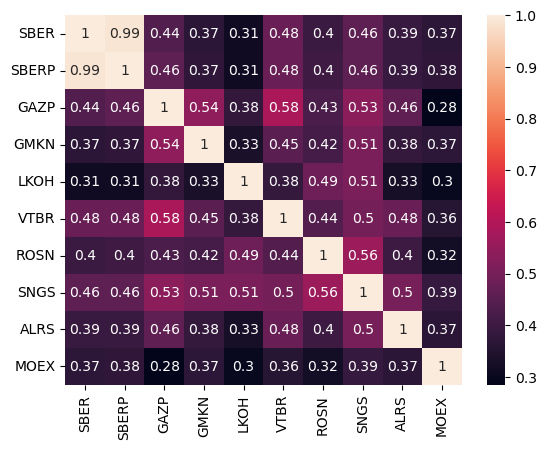

In [371]:
sns.heatmap(corr_rets, annot=True)